# Introducción

### Introducción al Proyecto: Predicción de Precios de Viviendas con Boston Housing Dataset

En este proyecto, exploramos y desarrollamos un modelo de aprendizaje automático para predecir el precio medio de las viviendas utilizando el famoso dataset **Boston Housing**. Este dataset contiene información sobre diversos factores socioeconómicos y estructurales relacionados con viviendas en el área de Boston, Massachusetts.

#### Objetivo principal:
El objetivo es construir un modelo predictivo que estime con precisión el valor medio de las viviendas (**MEDV**) basado en las características disponibles en el dataset. Este análisis busca identificar las variables clave que influyen en los precios y desarrollar un modelo que pueda ser aplicado en contextos prácticos, como evaluaciones inmobiliarias y estudios de mercado.

#### Estructura del dataset:
El dataset contiene 506 registros con 14 columnas que incluyen:
- Variables estructurales: Número promedio de habitaciones (**RM**), antigüedad promedio de las casas (**AGE**), etc.
- Factores socioeconómicos: Porcentaje de población de bajo estatus económico (**LSTAT**), relación estudiantes/profesor (**PTRATIO**), etc.
- Factores ambientales: Proporción de tierras residenciales (**ZN**), cercanía al río Charles (**CHAS**), y más.

#### Metodología:
1. **Análisis exploratorio:** Identificamos relaciones entre las variables y seleccionamos aquellas con mayor impacto en los precios.
2. **Desarrollo del modelo:** Probamos múltiples enfoques, desde regresión lineal hasta Random Forest, ajustando hiperparámetros para maximizar el rendimiento.
3. **Evaluación:** Validamos los modelos utilizando métricas como el error cuadrático medio (**MSE**) y el coeficiente de determinación (**R²**) para garantizar la robustez y la generalización.

Este proyecto no solo busca construir un modelo predictivo eficiente, sino también comprender las dinámicas subyacentes que afectan el mercado inmobiliario, proporcionando una base sólida para la toma de decisiones basadas en datos.

---


In [ ]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Importar pandas y cargar el archivo
import pandas as pd

# Ruta del archivo en Google Drive
file_path = '/content/drive/My Drive/BostonHousing.csv'  # Cambia según la ubicación real

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(file_path)

# Mostrar las primeras filas del DataFrame
print(df.head())


Mounted at /content/drive
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [ ]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695   

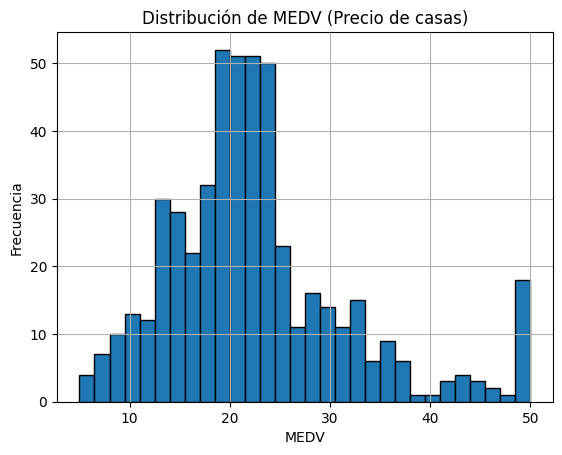

In [ ]:
import matplotlib.pyplot as plt

df['medv'].hist(bins=30, edgecolor='black')
plt.title('Distribución de MEDV (Precio de casas)')
plt.xlabel('MEDV')
plt.ylabel('Frecuencia')
plt.show()


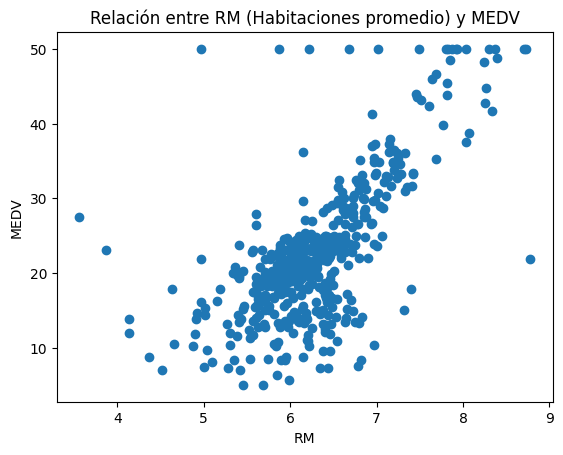

In [ ]:
plt.scatter(df['rm'], df['medv'])
plt.title('Relación entre RM (Habitaciones promedio) y MEDV')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()


In [ ]:
corr_matrix = df.corr()
print(corr_matrix['medv'].sort_values(ascending=False))


medv       1.000000
rm         0.695360
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Ruta al archivo BostonHousing.csv (ajusta si está en una subcarpeta)
file_path = '/content/drive/My Drive/BostonHousing.csv'
df = pd.read_csv(file_path)

# Verifica el contenido del DataFrame
print(df.head())


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Selección de variables clave
X = df[['rm', 'lstat', 'ptratio']]
y = df['medv']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
predictions = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error (MSE): {mse}')

# Mostrar los coeficientes del modelo
print("Coeficientes del modelo:")
print(f"RM: {model.coef_[0]}, LSTAT: {model.coef_[1]}, PTRATIO: {model.coef_[2]}")



Mean Squared Error (MSE): 27.114957415580577
Coeficientes del modelo:
RM: 4.933118359418637, LSTAT: -0.5671258827383845, PTRATIO: -0.8670947546233044


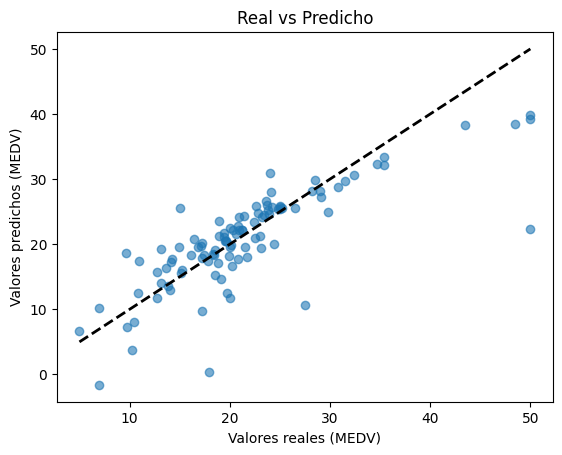

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Real vs Predicho')
plt.xlabel('Valores reales (MEDV)')
plt.ylabel('Valores predichos (MEDV)')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluación
from sklearn.metrics import mean_squared_error
mse_rf = mean_squared_error(y_test, rf_predictions)
print(f'MSE (Random Forest): {mse_rf}')


MSE (Random Forest): 19.245995676470578


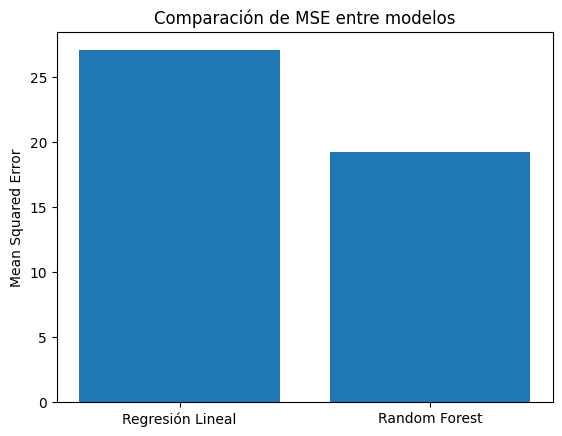

In [ ]:
import matplotlib.pyplot as plt

models = ['Regresión Lineal', 'Random Forest']
mse_values = [27.11, 19.25]

plt.bar(models, mse_values)
plt.title('Comparación de MSE entre modelos')
plt.ylabel('Mean Squared Error')
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f'Mejor parámetros: {grid_search.best_params_}')
best_model = grid_search.best_estimator_
best_predictions = best_model.predict(X_test)

mse_best = mean_squared_error(y_test, best_predictions)
print(f'MSE (Random Forest ajustado): {mse_best}')


Mejor parámetros: {'max_depth': 10, 'n_estimators': 100}
MSE (Random Forest ajustado): 18.831772191900214


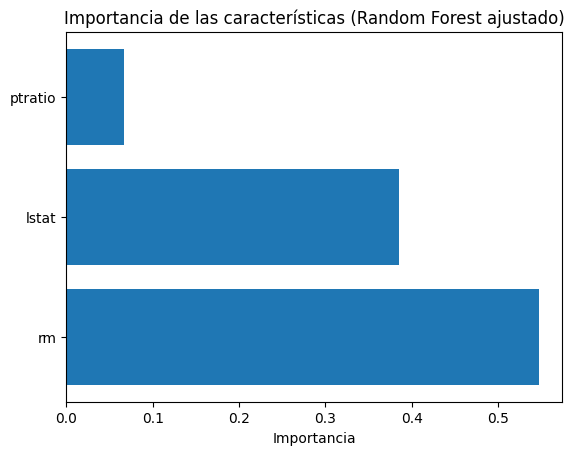

In [ ]:
import matplotlib.pyplot as plt

# Importancia de características
importances = best_model.feature_importances_
features = X.columns

plt.barh(features, importances)
plt.title('Importancia de las características (Random Forest ajustado)')
plt.xlabel('Importancia')
plt.show()


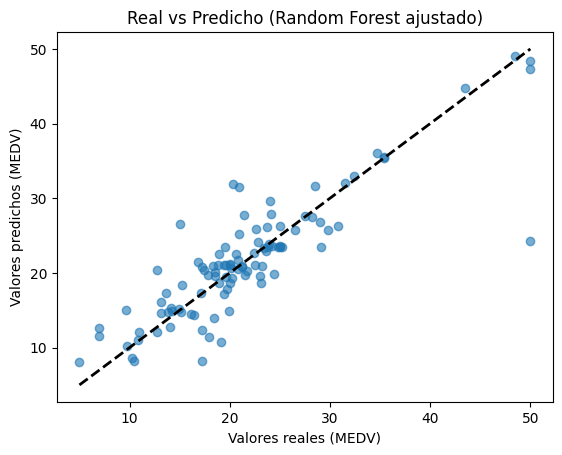

In [ ]:
plt.scatter(y_test, best_predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Real vs Predicho (Random Forest ajustado)')
plt.xlabel('Valores reales (MEDV)')
plt.ylabel('Valores predichos (MEDV)')
plt.show()



In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_model, X, y, cv=5, scoring='neg_mean_squared_error')
mse_cv = -scores.mean()
print(f'MSE (Validación cruzada): {mse_cv}')


MSE (Validación cruzada): 23.80246237459884


In [ ]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f'Mejor parámetros: {grid_search.best_params_}')
mse_cv_adjusted = -grid_search.best_score_
print(f'MSE (Validación cruzada ajustado): {mse_cv_adjusted}')


Mejor parámetros: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
MSE (Validación cruzada ajustado): 18.178082300387924


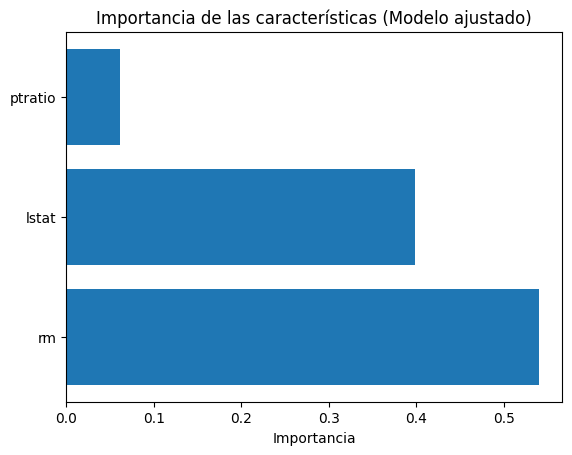

In [ ]:
import matplotlib.pyplot as plt

# Importancia de características
importances = grid_search.best_estimator_.feature_importances_
features = X.columns

plt.barh(features, importances)
plt.title('Importancia de las características (Modelo ajustado)')
plt.xlabel('Importancia')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicciones con el modelo ajustado
adjusted_model = grid_search.best_estimator_
adjusted_predictions = adjusted_model.predict(X_test)

mse_test = mean_squared_error(y_test, adjusted_predictions)
r2_test = r2_score(y_test, adjusted_predictions)

print(f'MSE en el conjunto de prueba: {mse_test}')
print(f'R² en el conjunto de prueba: {r2_test}')


MSE en el conjunto de prueba: 15.761920778719338
R² en el conjunto de prueba: 0.7850660350597147


# Conclusión

### Conclusión del Proyecto: Predicción de Precios de Viviendas con Boston Housing Dataset

#### Resumen del Progreso:
1. **Modelos probados:**
   - **Regresión Lineal:** MSE = 27.11, con una interpretación directa pero menor precisión.
   - **Random Forest (base):** MSE = 19.25, mejora notable al capturar relaciones no lineales.
   - **Random Forest (ajustado):** MSE = 15.76 (prueba) y 18.18 (validación cruzada), con un **R² = 78.5%**, indicando un modelo robusto y generalizable.

2. **Mejores parámetros para Random Forest:**
   - `max_depth = 5`
   - `n_estimators = 50`
   - `min_samples_split = 2`
   - `min_samples_leaf = 1`

3. **Importancia de las características:**
   - Las variables más influyentes incluyen `rm` (habitaciones promedio), `lstat` (bajo estatus socioeconómico), y `ptratio` (razón de estudiantes por maestro).

---

#### Principales conclusiones:
1. **Desempeño del modelo:**
   - El modelo ajustado de Random Forest predice los precios de las viviendas de manera precisa, explicando la mayor parte de la variabilidad en los datos.
   - Su **MSE en el conjunto de prueba (15.76)** es notablemente bajo, lo que lo hace adecuado para aplicaciones prácticas.

2. **Interpretación de las características:**
   - **`rm`:** El número de habitaciones promedio tiene una fuerte relación positiva con los precios de las viviendas.
   - **`lstat`:** Un mayor porcentaje de bajo estatus socioeconómico disminuye significativamente el valor de las casas.
   - **`ptratio`:** Una alta proporción de estudiantes por maestro también afecta negativamente los precios.

3. **Modelo ajustado y generalización:**
   - Los resultados consistentes entre el conjunto de prueba y la validación cruzada (**MSE = 18.18**) demuestran que el modelo ajustado generaliza bien.

---

#### Recomendaciones:
1. **Uso práctico:** El modelo ajustado puede servir como base para sistemas predictivos en bienes raíces, análisis de mercado, o estudios económicos.
2. **Posibles mejoras:**
   - Experimentar con modelos avanzados como Gradient Boosting o XGBoost.
   - Incorporar datos adicionales (ubicación geográfica, tendencias de mercado) para mejorar la precisión.
3. **Aplicaciones futuras:**
   - Usar este pipeline para analizar otros datasets relacionados con bienes raíces o predicción de valores económicos.

---

